In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [59]:
# Load dataset
data = pd.read_csv("uganda_monthly_rainfall_and_climate_variables_1981_2025.csv")
data

,district,region,date,rainfall_mm,dewpoint_temperature,temperature,surface_pressure_pa,total_cloud_cover,wind_u_component,wind_v_component
0,Abim,Northern,1981-01,7.921172,7.92266,26.19546,88380.490,0.350660,-2.446590,-0.469906
1,Abim,Northern,1981-02,18.791414,8.58206,26.59573,88324.414,0.458239,-2.520942,-0.506171
2,Abim,Northern,1981-03,104.911260,15.04592,24.87512,88366.914,0.852498,-1.497407,-0.028231
3,Abim,Northern,1981-04,133.041992,18.43658,23.10357,88423.490,0.820665,-1.020124,0.326704
4,Abim,Northern,1981-05,100.246476,18.33070,22.67858,88494.125,0.695249,-0.429709,0.582360
...,...,...,...,...,...,...,...,...,...,...
64555,Zombo,Northern,2025-06,48.360441,15.84435,21.92928,86750.330,0.506584,-0.571844,1.123100
64556,Zombo,Northern,2025-07,104.308894,16.48016,21.25292,86811.125,0.623064,-0.445545,0.505518
64557,Zombo,Northern,2025-08,267.582618,16.89825,20.39813,86739.305,0.753444,0.122891,0.172524
64558,Zombo,Northern,2025-09,101.652369,16.79864,21.38238,86690.110,0.706700,-0.062068,-0.059908


In [60]:
# checking for any missing values
print(data.isnull().sum())

district                0
region                  0
date                    0
rainfall_mm             0
dewpoint_temperature    0
temperature             0
surface_pressure_pa     0
total_cloud_cover       0
wind_u_component        0
wind_v_component        0
dtype: int64


In [61]:
data.describe()

,rainfall_mm,dewpoint_temperature,temperature,surface_pressure_pa,total_cloud_cover,wind_u_component,wind_v_component
count,64560.000000,64560.000000,64560.000000,64560.000000,64560.000000,64560.000000,64560.000000
mean,103.560800,16.902592,22.793645,88204.349476,0.691618,-0.372573,0.330000
std,61.447960,2.571416,2.098390,2409.352831,0.119827,0.570880,0.644031
min,0.001431,2.185100,13.651640,77335.220000,0.185631,-4.170265,-2.645571
25%,54.155007,15.681155,21.567830,87177.522500,0.618075,-0.555824,-0.114256
50%,100.957259,17.605490,22.758265,88692.320000,0.702333,-0.266326,0.217918
75%,144.131337,18.751008,24.013928,89438.186000,0.779770,-0.033851,0.739212
max,508.316732,21.689600,30.736500,93284.914000,0.965616,1.539438,4.486460


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64560 entries, 0 to 64559
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   district              64560 non-null  object 
 1   region                64560 non-null  object 
 2   date                  64560 non-null  object 
 3   rainfall_mm           64560 non-null  float64
 4   dewpoint_temperature  64560 non-null  float64
 5   temperature           64560 non-null  float64
 6   surface_pressure_pa   64560 non-null  float64
 7   total_cloud_cover     64560 non-null  float64
 8   wind_u_component      64560 non-null  float64
 9   wind_v_component      64560 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.9+ MB


In [63]:
# set the style for seaborn
sns.set(style="whitegrid")

**Distributions**

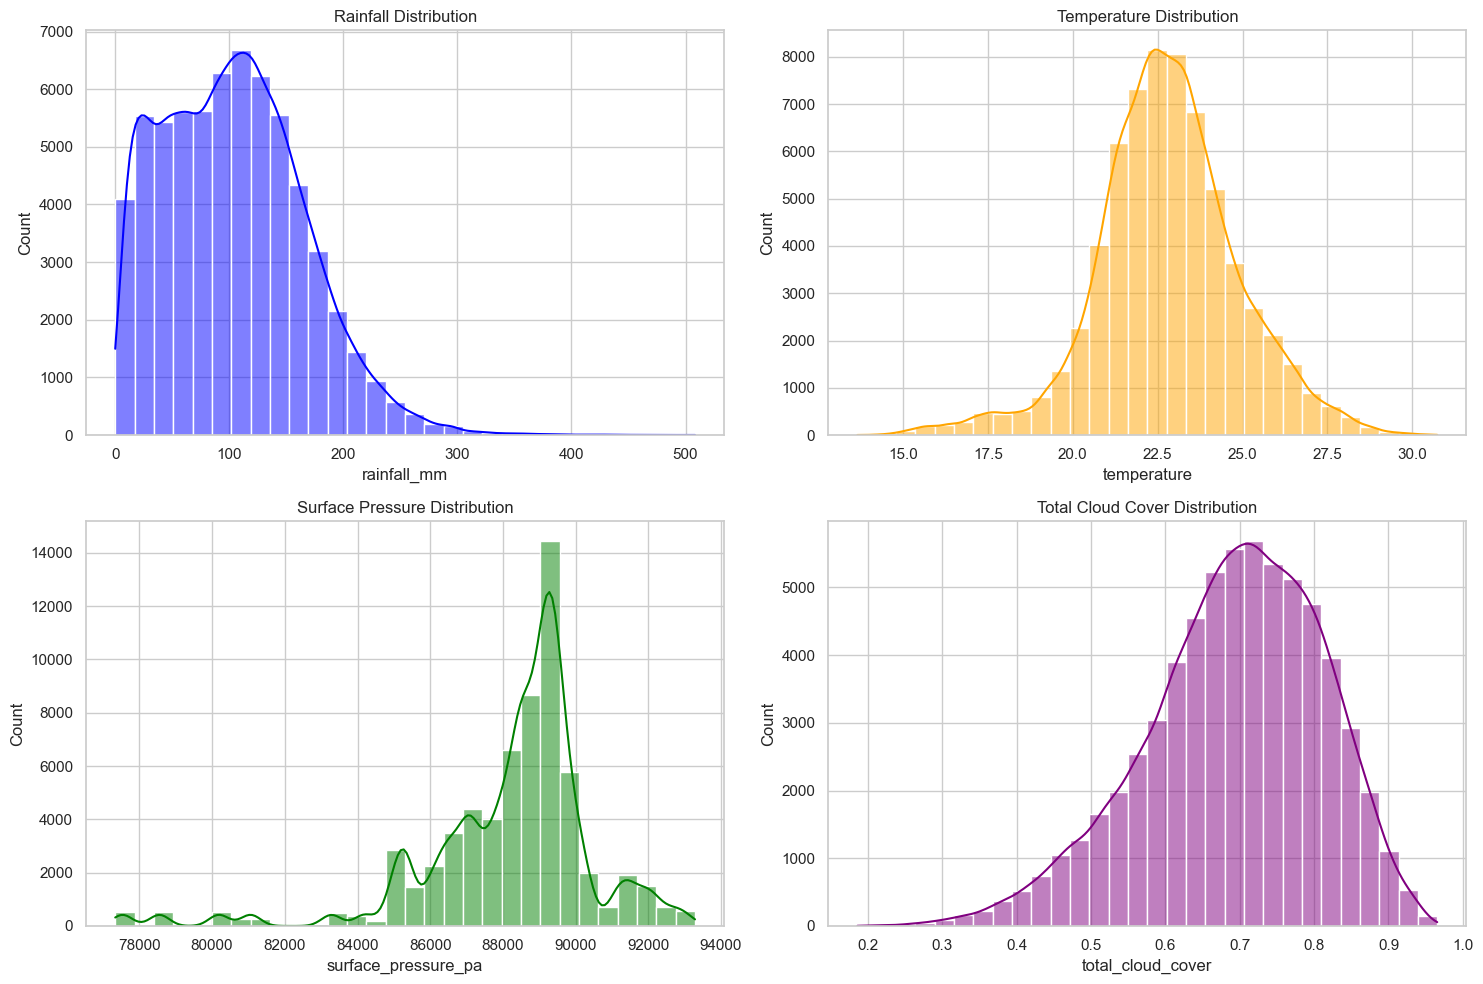

In [64]:
# plot the distributions of variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Rainfall distribution
sns.histplot(data["rainfall_mm"], bins=30, kde=True, ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Rainfall Distribution")

# Temperature distribution
sns.histplot(data["temperature"], bins=30, kde=True, ax=axes[0, 1], color="orange")
axes[0, 1].set_title("Temperature Distribution")

# Surface Pressure distribution
sns.histplot(
    data["surface_pressure_pa"], bins=30, kde=True, ax=axes[1, 0], color="green"
)
axes[1, 0].set_title("Surface Pressure Distribution")

# Cloud Cover distribution
sns.histplot(
    data["total_cloud_cover"], bins=30, kde=True, ax=axes[1, 1], color="purple"
)
axes[1, 1].set_title("Total Cloud Cover Distribution")

plt.tight_layout()
plt.show()

**Correlation Analysis**

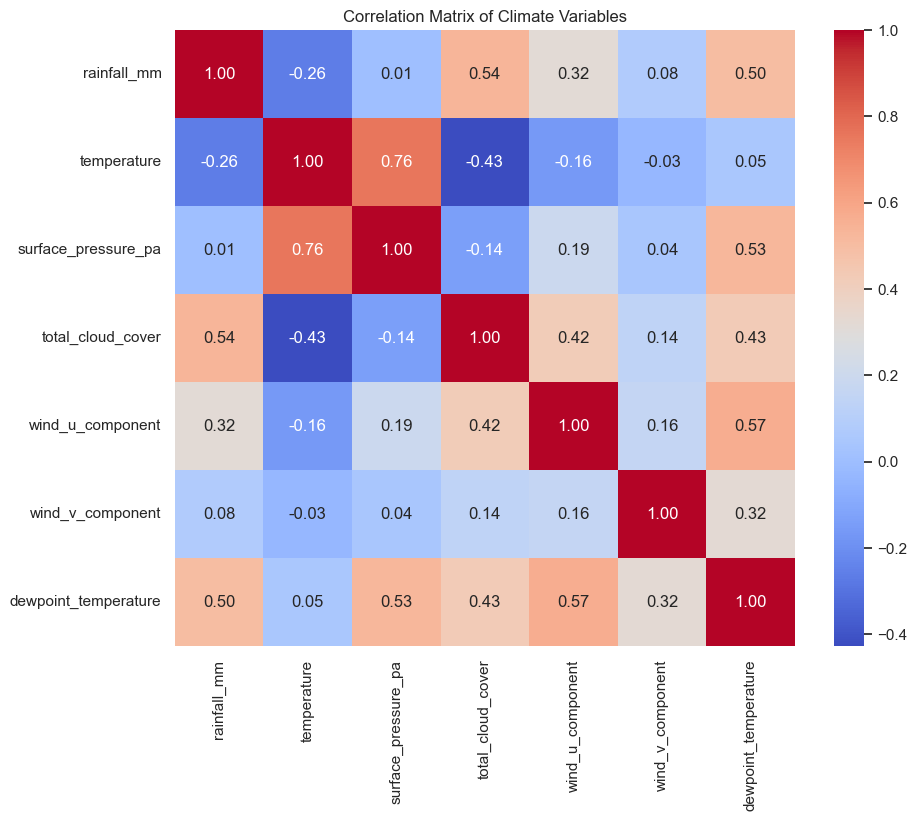

In [65]:
# Calculate correlation matrix
corr = data[
    [
        "rainfall_mm",
        "temperature",
        "surface_pressure_pa",
        "total_cloud_cover",
        "wind_u_component",
        "wind_v_component",
        "dewpoint_temperature",
    ]
].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Climate Variables")
plt.show()

**Time Series Analysis**

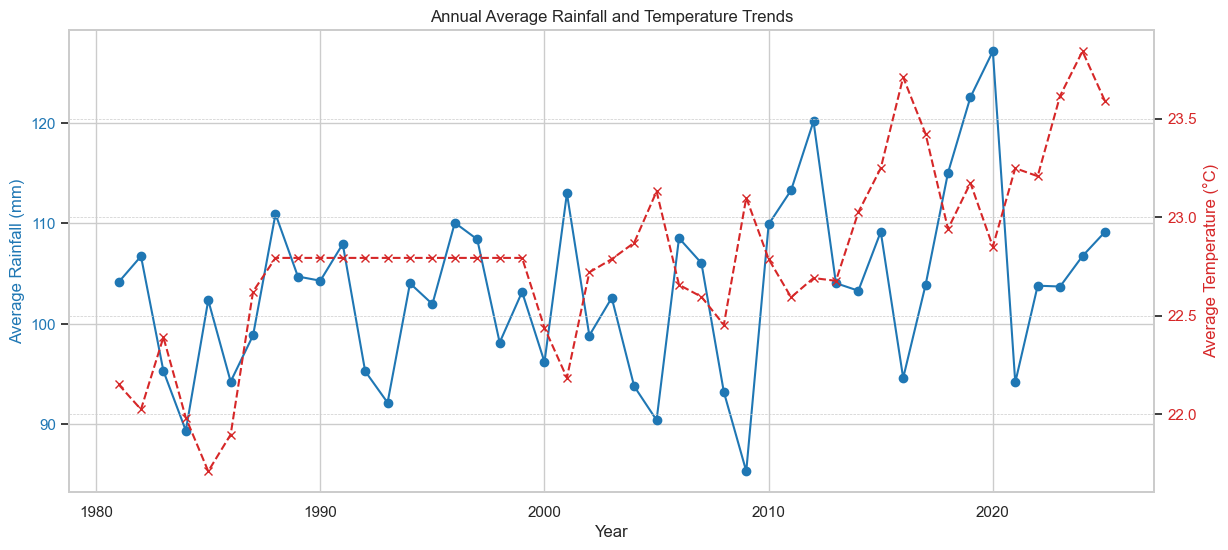

In [66]:
# Convert 'date' column to datetime format
data["date"] = pd.to_datetime(data["date"])

# Group data by year to get annual averages
annual_trend = data.groupby(data["date"].dt.year)[["rainfall_mm", "temperature"]].mean()

fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot rainfall trend
color = "tab:blue"
ax1.set_xlabel("Year")
ax1.set_ylabel("Average Rainfall (mm)", color=color)
ax1.plot(
    annual_trend.index,
    annual_trend["rainfall_mm"],
    color=color,
    marker="o",
    label="Average Rainfall",
)
ax1.tick_params(axis="y", labelcolor=color)

# Create a second y-axis for temperature
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Average Temperature (°C)", color=color)
ax2.plot(
    annual_trend.index,
    annual_trend["temperature"],
    color=color,
    marker="x",
    linestyle="--",
    label="Average Temperature",
)
ax2.tick_params(axis="y", labelcolor=color)

plt.title("Annual Average Rainfall and Temperature Trends")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

**Seasonality Analysis**

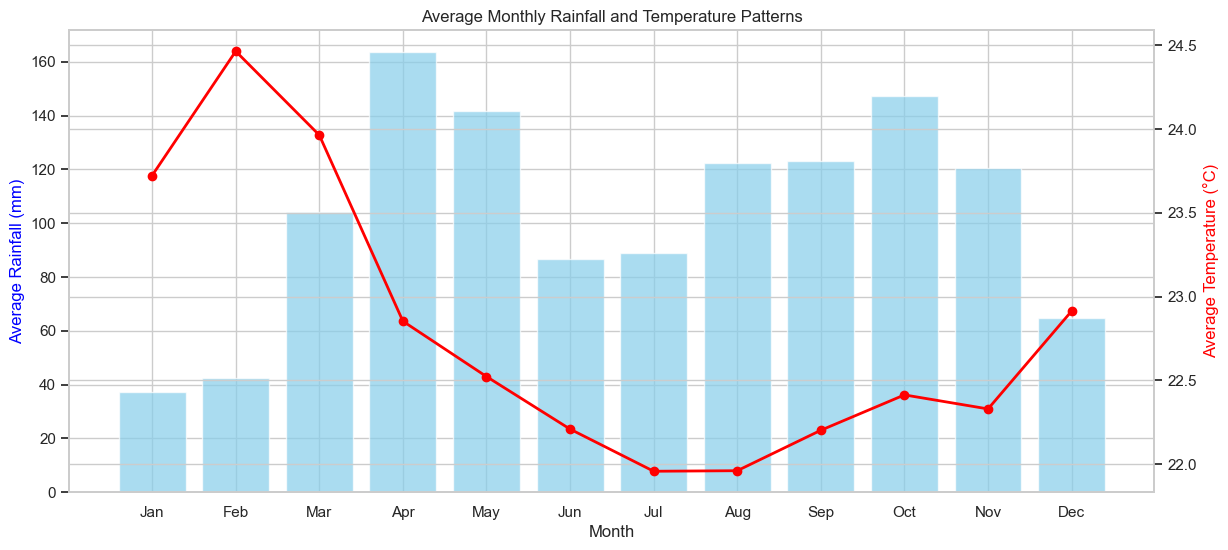

In [67]:
# Group data by month to get average seasonal patterns
monthly_pattern = data.groupby(data["date"].dt.month)[
    ["rainfall_mm", "temperature"]
].mean()

fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot rainfall seasonal pattern
ax1.set_xlabel("Month")
ax1.set_ylabel("Average Rainfall (mm)", color="blue")
ax1.bar(
    monthly_pattern.index,
    monthly_pattern["rainfall_mm"],
    color="skyblue",
    alpha=0.7,
    label="Average Rainfall",
)
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(
    ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
)

# Create a second y-axis for temperature
ax2 = ax1.twinx()
ax2.set_ylabel("Average Temperature (°C)", color="red")
ax2.plot(
    monthly_pattern.index,
    monthly_pattern["temperature"],
    color="red",
    marker="o",
    linewidth=2,
    label="Average Temperature",
)

plt.title("Average Monthly Rainfall and Temperature Patterns")
plt.show()

**Regional Comparisons**

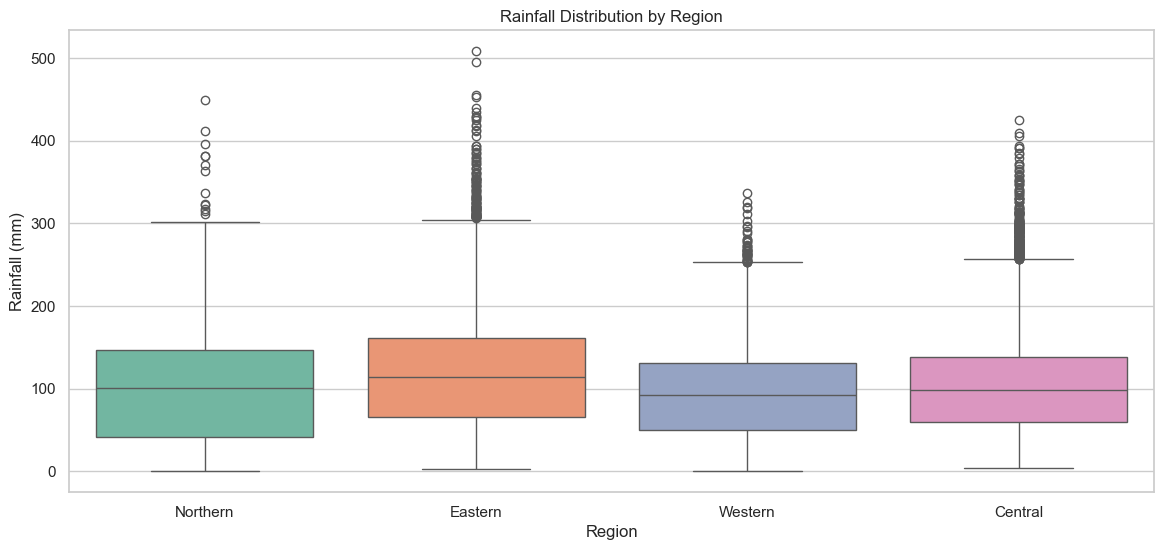

In [68]:
plt.figure(figsize=(14, 6))
sns.boxplot(
    x="region", y="rainfall_mm", data=data, hue="region", legend=False, palette="Set2"
)
plt.title("Rainfall Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Rainfall (mm)")
plt.show()

**District Analysis**

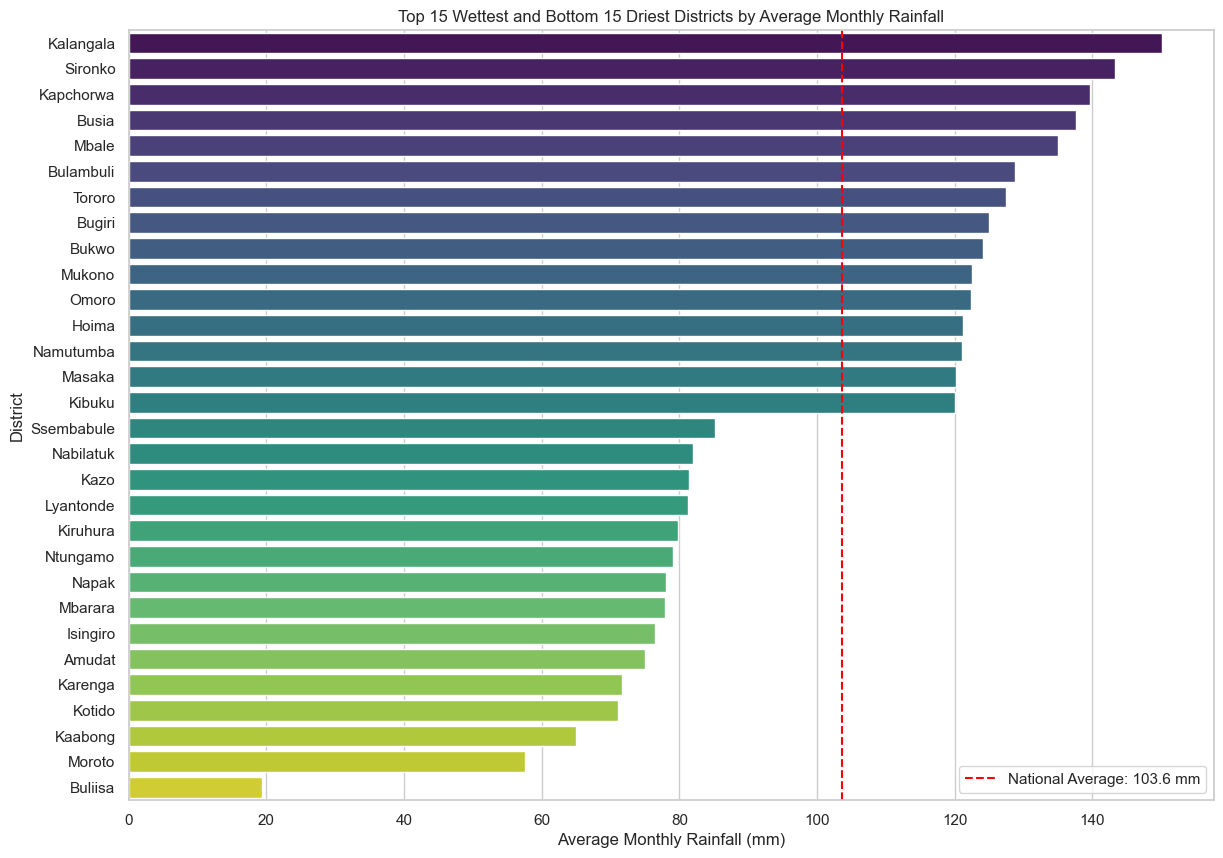

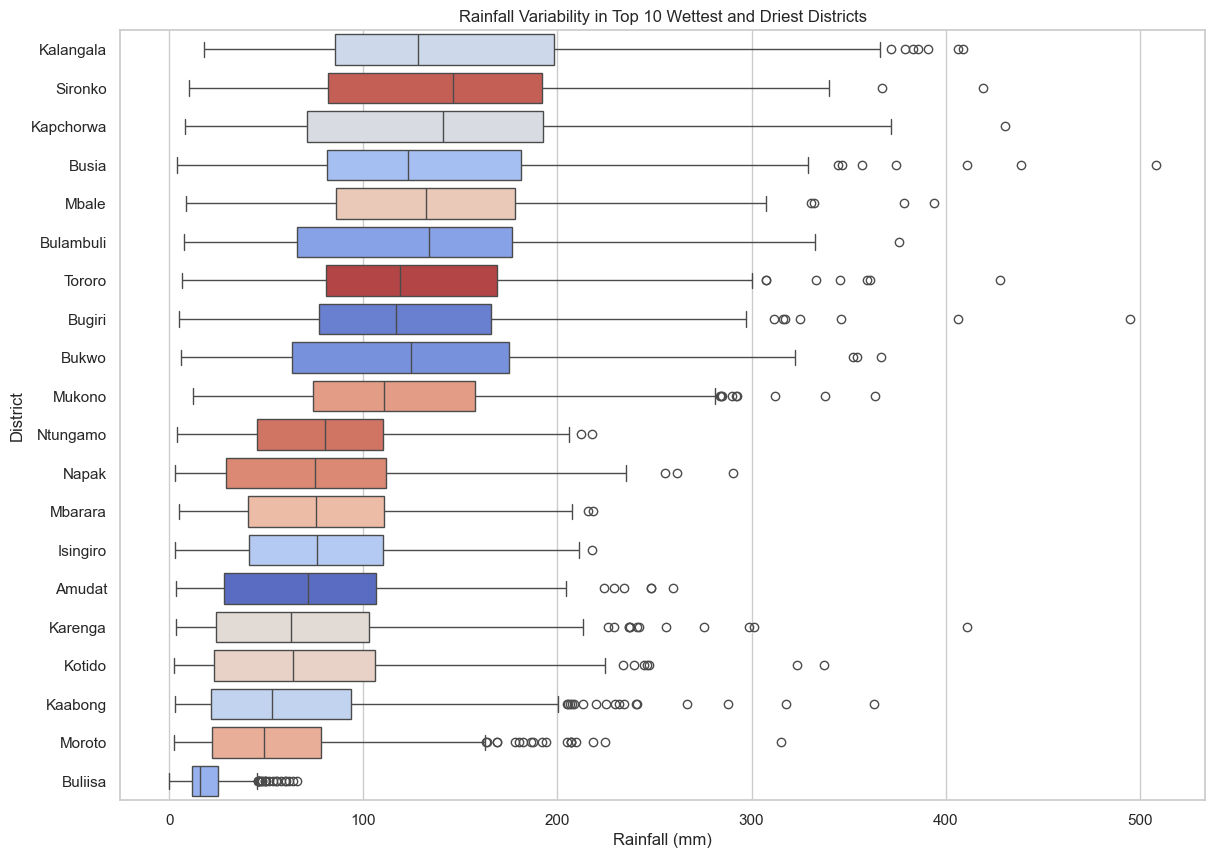

In [69]:
# Calculate monthly averages for each district
district_monthly = (
    data.groupby("district")["rainfall_mm"].mean().sort_values(ascending=False)
)

# Select the extremes (top 15 wettest and bottom 15 driest districts)
top_districts = district_monthly.head(15)
bottom_districts = district_monthly.tail(15)
extreme_districts = pd.concat([top_districts, bottom_districts])

# Plotting
plt.figure(figsize=(14, 10))
sns.barplot(
    x=extreme_districts.values,
    y=extreme_districts.index,
    palette="viridis",
    hue=extreme_districts.index,
    legend=False,
)

plt.title("Top 15 Wettest and Bottom 15 Driest Districts by Average Monthly Rainfall")
plt.xlabel("Average Monthly Rainfall (mm)", fontsize=12)
plt.ylabel("District", fontsize=12)
plt.axvline(
    x=district_monthly.mean(),
    color="red",
    linestyle="--",
    label=f"National Average: {district_monthly.mean():.1f} mm",
)
plt.legend()
plt.show()

# Boxplot for variability (top 10 wettest and driest districts)
selected_districts = list(district_monthly.head(10).index) + list(
    district_monthly.tail(10).index
)
subset = data[data["district"].isin(selected_districts)]

plt.figure(figsize=(14, 10))
sns.boxplot(
    x="rainfall_mm",
    y="district",
    data=subset,
    order=selected_districts,
    palette="coolwarm",
    hue="district",
    legend=False,
)
plt.title("Rainfall Variability in Top 10 Wettest and Driest Districts")
plt.xlabel("Rainfall (mm)")
plt.ylabel("District")
plt.show()

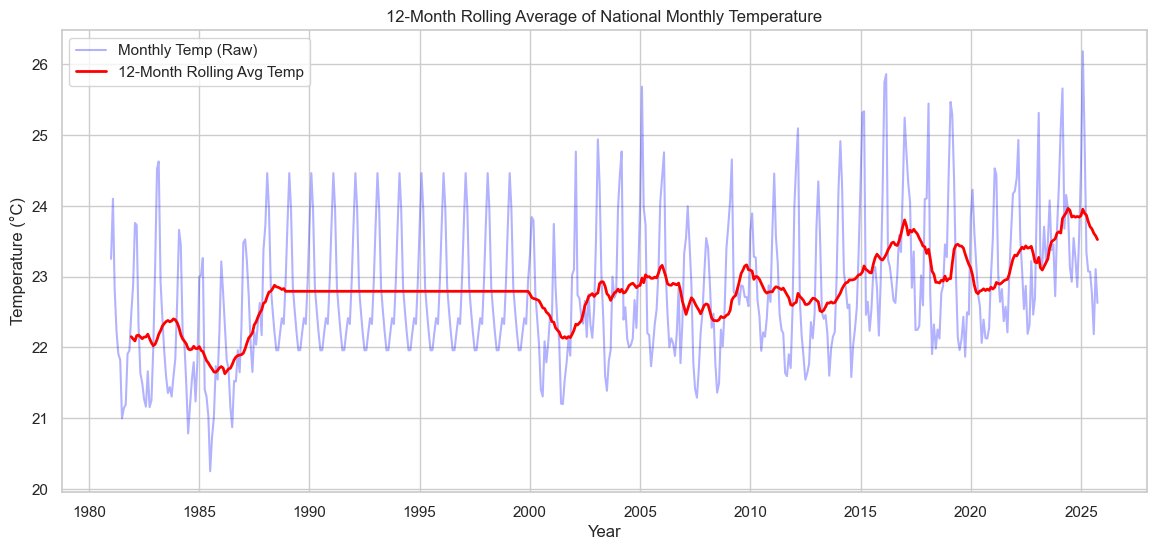

In [70]:
# Calculate national monthly averages
numeric_cols = data.select_dtypes(include=["number"]).columns
national_monthly_avg = data.groupby("date")[numeric_cols].mean()

# Calculate 12_month rolling averages
rolling_avg = (
    national_monthly_avg[["rainfall_mm", "temperature"]].rolling(window=12).mean()
)

fig, ax = plt.subplots(figsize=(14, 6))

# Plot rolling averages
ax.plot(
    national_monthly_avg.index,
    national_monthly_avg["temperature"],
    label="Monthly Temp (Raw)",
    alpha=0.3,
    color="blue",
)

ax.plot(
    rolling_avg.index,
    rolling_avg["temperature"],
    label="12-Month Rolling Avg Temp",
    color="red",
    linewidth=2,
)


plt.title("12-Month Rolling Average of National Monthly Temperature")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

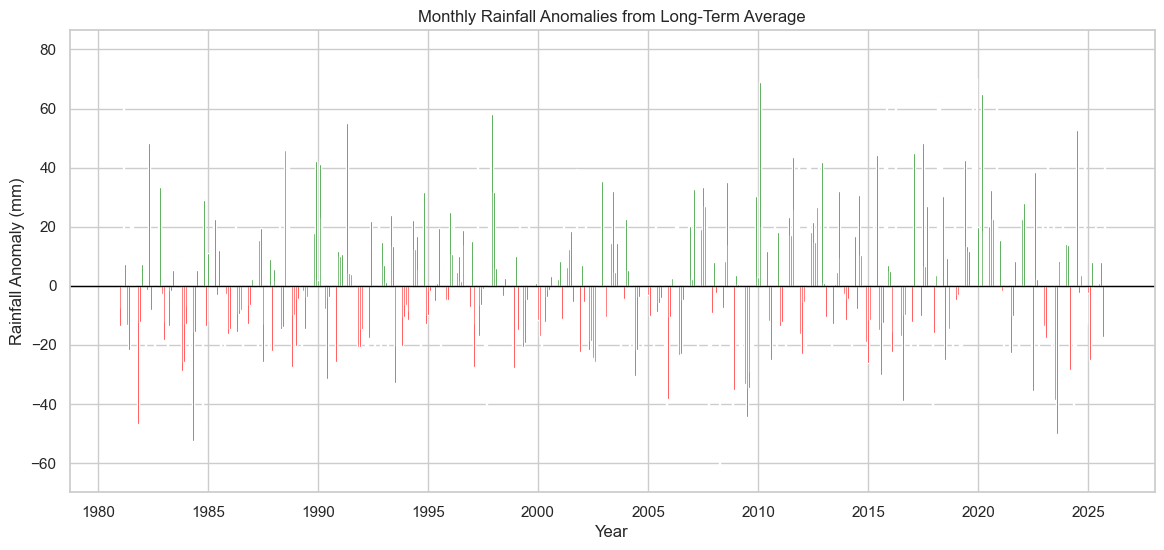

In [71]:
# Calculate long term averages for each month
long_term_avg = national_monthly_avg.groupby(national_monthly_avg.index.month)[
    "rainfall_mm"
].mean()

# Subtract long term average to get anomalies
national_monthly_avg["month"] = national_monthly_avg.index.month
national_monthly_avg["rainfall_anomaly"] = national_monthly_avg[
    "rainfall_mm"
] - national_monthly_avg["month"].map(long_term_avg)

# Plot rainfall anomalies
plt.figure(figsize=(14, 6))

colors = [
    "green" if x >= 0 else "red" for x in national_monthly_avg["rainfall_anomaly"]
]

plt.bar(
    national_monthly_avg.index,
    national_monthly_avg["rainfall_anomaly"],
    color=colors,
    width=25,
)
plt.axhline(0, color="black", linewidth=1)
plt.title("Monthly Rainfall Anomalies from Long-Term Average")
plt.xlabel("Year")
plt.ylabel("Rainfall Anomaly (mm)")
plt.show()

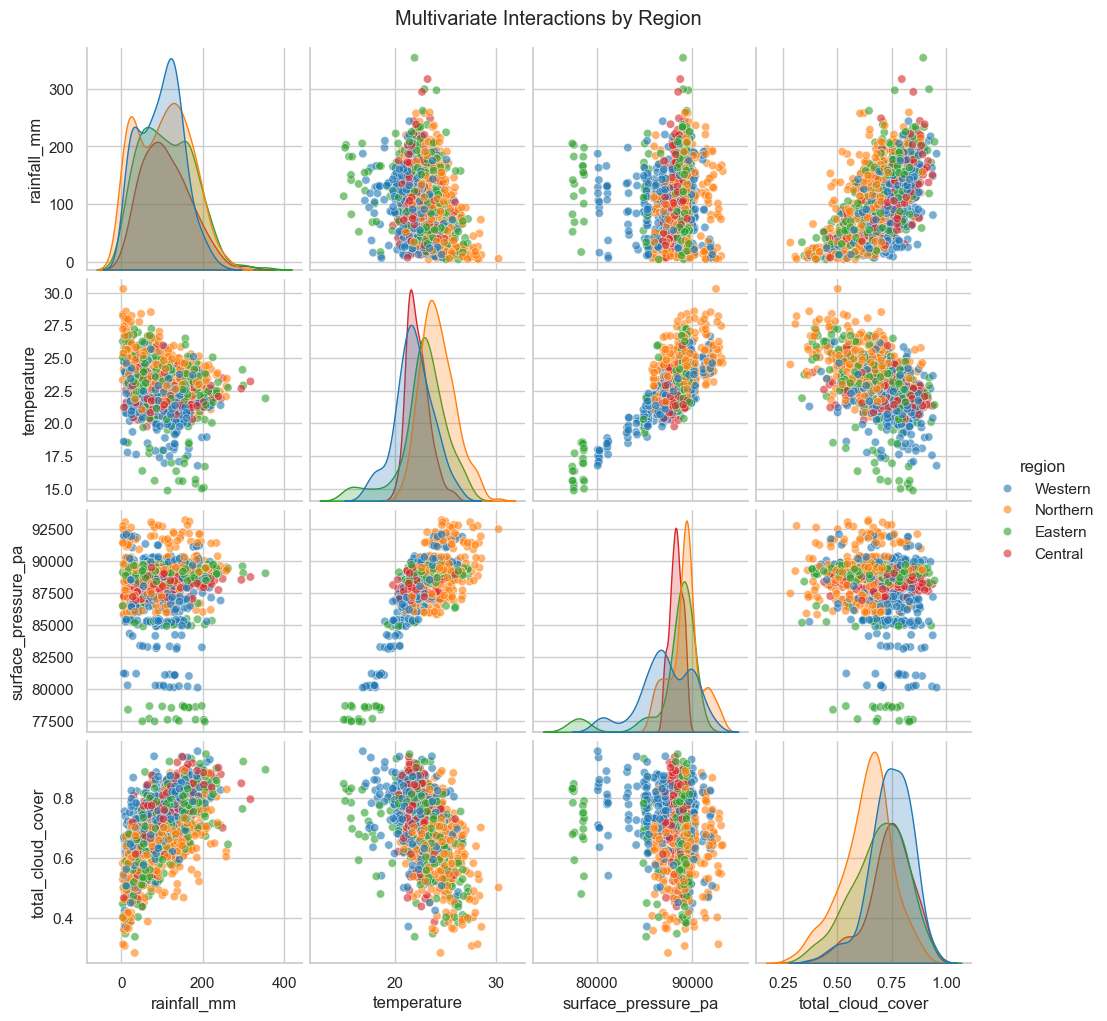

In [72]:
# Sample 1,000 points to keep the plot readable
subset = data.sample(1000, random_state=42)

# Select main variables
variables_to_plot = [
    "rainfall_mm",
    "temperature",
    "surface_pressure_pa",
    "total_cloud_cover",
]

sns.pairplot(
    subset,
    vars=variables_to_plot,
    hue="region",
    palette="tab10",
    plot_kws={"alpha": 0.6},
)

plt.suptitle("Multivariate Interactions by Region", y=1.02)
plt.show()

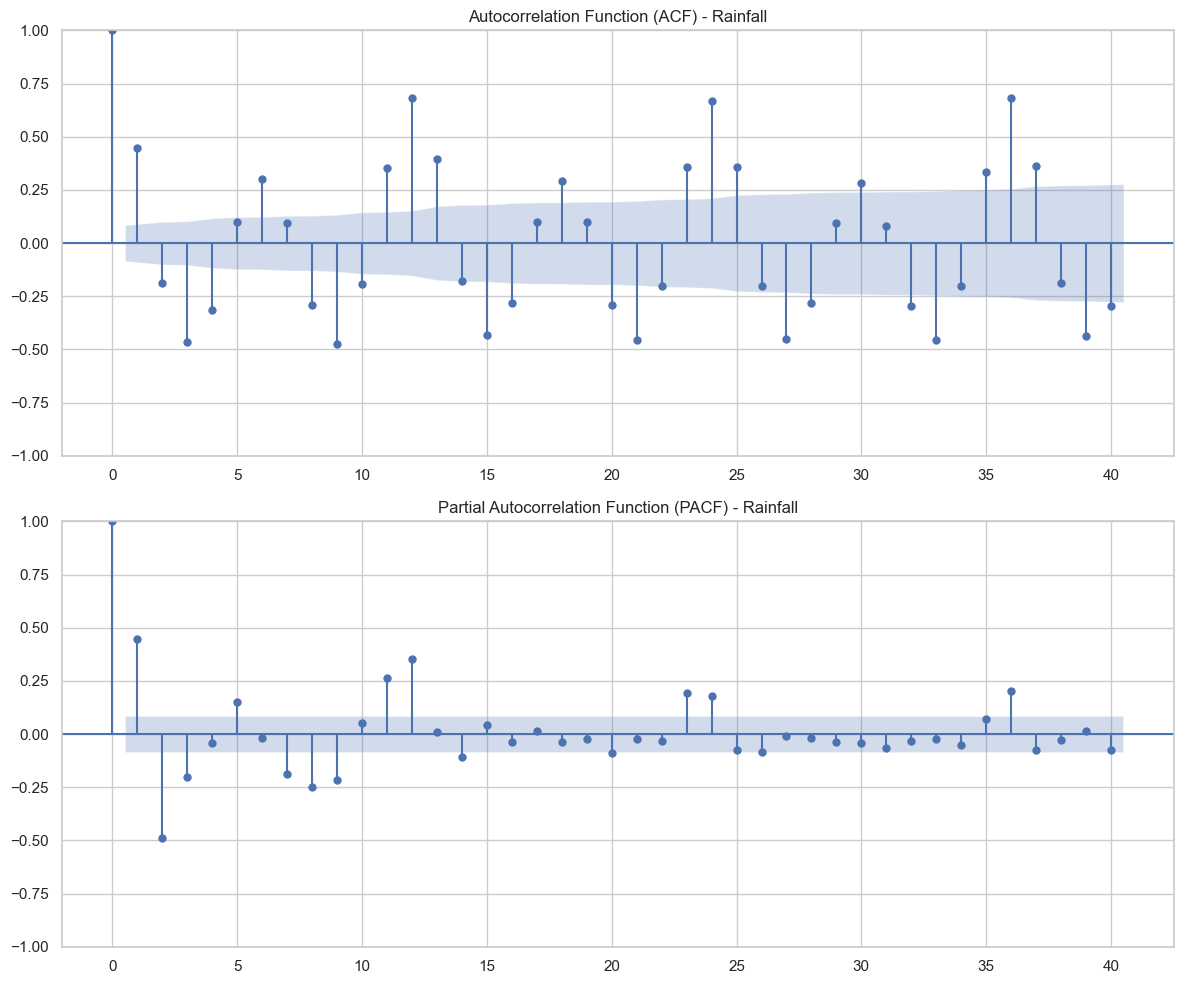

ADF Statistics: -5.190595880431314
p_value: 9.189194670970944e-06
Critical Values:
\1%: -3.4428912664970523
\5%: -2.867071538125014
\10%: -2.5697161081813413

 The time series is stationary (ready for modeling)


In [73]:
# Analyze national average rainfall to keep it clear
national_rainfall = data.groupby("date")["rainfall_mm"].mean()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

plot_acf(
    national_rainfall,
    lags=40,
    ax=ax1,
    title="Autocorrelation Function (ACF) - Rainfall",
)

plot_pacf(
    national_rainfall,
    lags=40,
    ax=ax2,
    title="Partial Autocorrelation Function (PACF) - Rainfall",
)

plt.tight_layout()
plt.show()


result = adfuller(national_rainfall.dropna())

print("ADF Statistics:", result[0])
print("p_value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"\{key}: {value}")

if result[1] < 0.05:
    print("\n The time series is stationary (ready for modeling)")

else:
    print("\n The time series is not stationary (needs detrending)")